<a href="https://colab.research.google.com/github/thanquengoc/MIS_311/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# Import Pandas and Numpy
import pandas as pd

In [101]:
# Read data file
df = pd.read_excel("/content/06_Student Perfomance.xlsx")
df

,gender,race_ethnicity,parental_level_of_education,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,72,72,74,218,72.666667
1,0,group C,some college,69,90,88,247,82.333333
2,0,group B,master's degree,90,95,93,278,92.666667
3,1,group A,associate's degree,47,57,44,148,49.333333
4,1,group C,some college,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...
197,0,group C,master's degree,69,84,85,238,79.333333
198,1,group D,associate's degree,61,55,52,168,56.000000
199,1,group C,some high school,59,69,65,193,64.333333
200,1,group E,high school,55,56,51,162,54.000000


# **Part 1: Data Analysis and Insight**

## **1.Data Overview**

In [102]:
# Check type of column
df.dtypes

,0
gender,int64
race_ethnicity,object
parental_level_of_education,object
math_score,int64
reading_score,int64
writing_score,int64
total_score,int64
average_score,float64


In [103]:
# Number of rows and columns

df.shape # 202 rows and 8 columns

(202, 8)

The ***Student Performance*** dataset provides detailed information on students’ demographic backgrounds and their academic achievements across three subjects: math, reading, and writing. It contains **202 rows** and **8 columns**, where each row represents an individual student.

**Data Column Descriptions**
* race_ethnicity  (object): Different racial groups  
* parental_level_of_education (object): The educational background of the student's family  
* math_score (int): Performance in math  
* reading_score (int): Performance in reading  
* writing_score (int): Performance in writing skills
* total_score (int): The sum of math, reading, and writing scores
* average_score (float): The mean of the three subject scores

The dataset is designed to explore how factors such as gender, race ethnicity, and parental education influence student performance. It serves as a representative sample for analyzing educational outcomes and evaluating factors affecting student success.

## **2.Data cleaning**

In [104]:
# Identify mising value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       202 non-null    int64  
 1   race_ethnicity               202 non-null    object 
 2   parental_level_of_education  199 non-null    object 
 3   math_score                   202 non-null    int64  
 4   reading_score                202 non-null    int64  
 5   writing_score                202 non-null    int64  
 6   total_score                  202 non-null    int64  
 7   average_score                198 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 12.8+ KB


The ***parental_level_of_education*** column has **3** missing values.  
The ***average_score*** column has **4** missing values.  
The remaining columns has no missing values.

The ***parental_level_of_education*** column I will fill "**not updated**" in the missing blank by using `fillna()` funtion.   

The ***average_score*** column is missing some spaces so I will calculate and fill in the blanks using the `fillna()` function

In [105]:
# Handle missing values in the parental_level_of_education column
df["parental_level_of_education"] = df["parental_level_of_education"].fillna("not updated")

In [106]:
# Handle missing values in the average_score column
df["average_score"] = df["average_score"].fillna((df["total_score"] / 3))

In [107]:
# Check the missing values again
df.info() # There is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       202 non-null    int64  
 1   race_ethnicity               202 non-null    object 
 2   parental_level_of_education  202 non-null    object 
 3   math_score                   202 non-null    int64  
 4   reading_score                202 non-null    int64  
 5   writing_score                202 non-null    int64  
 6   total_score                  202 non-null    int64  
 7   average_score                202 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 12.8+ KB


In [108]:
# Identify any duplicate rows
df[df.duplicated(keep=False)]

,gender,race_ethnicity,parental_level_of_education,math_score,reading_score,writing_score,total_score,average_score
10,1,group C,associate's degree,58,54,52,164,54.666667
12,1,group C,associate's degree,58,54,52,164,54.666667
54,1,group D,high school,88,78,75,241,80.333333
55,1,group D,high school,88,78,75,241,80.333333
63,1,group A,not updated,39,39,34,112,37.333333
64,1,group A,not updated,39,39,34,112,37.333333


In [109]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
df

,gender,race_ethnicity,parental_level_of_education,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,72,72,74,218,72.666667
1,0,group C,some college,69,90,88,247,82.333333
2,0,group B,master's degree,90,95,93,278,92.666667
3,1,group A,associate's degree,47,57,44,148,49.333333
4,1,group C,some college,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...
197,0,group C,master's degree,69,84,85,238,79.333333
198,1,group D,associate's degree,61,55,52,168,56.000000
199,1,group C,some high school,59,69,65,193,64.333333
200,1,group E,high school,55,56,51,162,54.000000


## **3.Descriptive Statistics**

In [110]:
# Main characteristics of the data
round(df[["math_score", "reading_score", "writing_score", "total_score", "average_score"]].describe(), 2)

,math_score,reading_score,writing_score,total_score,average_score
count,199.00,199.00,199.00,199.00,199.00
mean,64.22,67.63,66.37,198.21,66.07
std,15.90,15.78,16.26,46.20,15.40
min,0.00,17.00,10.00,27.00,9.00
25%,54.00,55.50,55.00,165.00,55.00
50%,65.00,68.00,68.00,199.00,66.33
75%,75.00,79.00,78.00,233.00,77.67
max,100.00,100.00,100.00,299.00,99.67


This table shows descriptive statistics for students' scores in math, reading, writing, total score, and average score. On average, students scored between 64 and 67 points in each subject. Students score around 64.22 in math, 67.63 in reading, and 66.37 in writing, showing slightly stronger performance in reading. The minimum score is quite low, while the maximum score is 100, indicating a wide range of scores. The standard deviation (about 15-16) shows some variation in performance among students. Overall, the data shows average performance with some individual variation in achievement levels.

In [111]:
# Compare whether parents' educational level affects children's average score
df_visualization_1 = pd.DataFrame(df.groupby("parental_level_of_education")["average_score"].mean())
df_visualization_1

,average_score
parental_level_of_education,
associate's degree,65.782313
bachelor's degree,73.031746
high school,62.288889
master's degree,72.274510
not updated,51.000000
some college,67.700680
some high school,60.462366


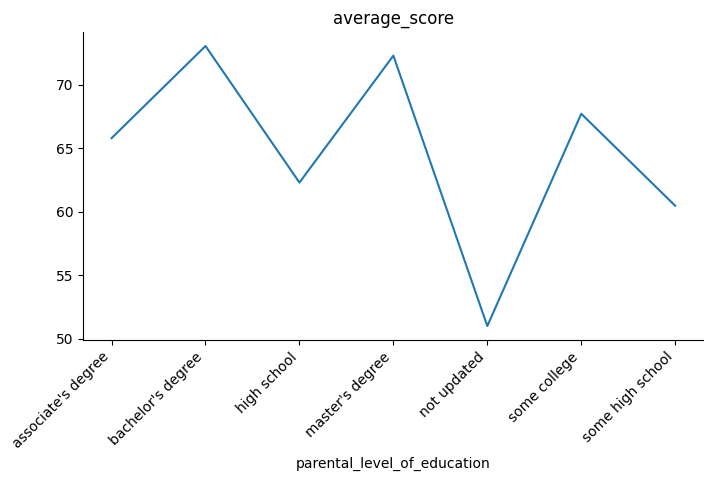

In [112]:
from matplotlib import pyplot as plt
df_visualization_1['average_score'].plot(kind='line', figsize=(8, 4), title='average_score')
plt.xticks(rotation=45, ha='right')
plt.gca().spines[['top', 'right']].set_visible(False)

The results showed that students whose parents had higher levels of education, such as bachelor’s or master’s degrees, tended to have higher average scores than other students. This suggests that parental education has a significant impact on children’s academic achievement. Understanding this can help schools and families provide appropriate support to help students from different backgrounds perform better in their studies.

In [113]:
# Compare the average scores between different race_ethnicity groups.
data_visulization_2 = pd.DataFrame(df.groupby("race_ethnicity")["average_score"].mean())
data_visulization_2


,average_score
race_ethnicity,
group A,59.333333
group B,64.424242
group C,65.633333
group D,68.026144
group E,70.271605


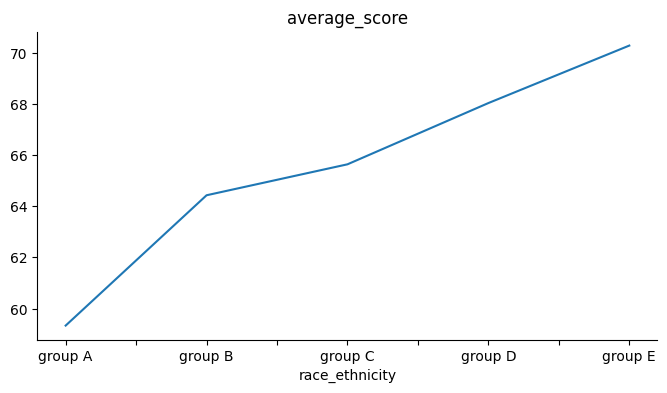

In [114]:
from matplotlib import pyplot as plt
data_visulization_2['average_score'].plot(kind='line', figsize=(8, 4), title='average_score')
plt.gca().spines[['top', 'right']].set_visible(False)

The table shows that average scores vary across different race ethnicity groups. Group A has the lowest average score at 58.11, while Group E has the highest at 70.27. There is a clear upward trend from Group A to Group E, indicating that race ethnicity may be associated with differences in academic performance.

In [115]:
# Compare the scores of 3 subjects across 2 different genders to see if there is any difference
data_visulization_3 = df.groupby("gender")[["math_score", "writing_score", "reading_score"]].mean()
data_visulization_3


,math_score,writing_score,reading_score
gender,,,
0,63.565657,71.89899,72.454545
1,64.860000,60.89000,62.850000


<Axes: xlabel='gender'>

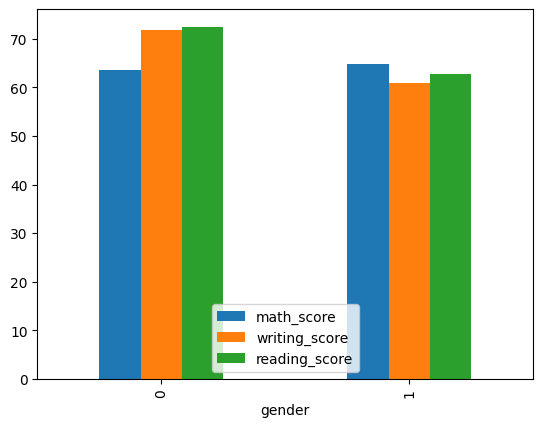

In [116]:
data_visulization_3.plot(kind="bar")

The data show that there is a difference in average scores between the two genders. The group with gender =0 (probably female) scored significantly higher in writing and reading, while the group with gender  1 (probably male) scored slightly higher in math. This suggests that female students tend to be stronger in language subjects, while male students are stronger in math. Overall, this difference reflects the gender differences in subject-specific learning.

## **Conclusion**

In summary, the results of the analysis show that many personal and social factors influence students' academic achievement. Parental level of education, gender, and race ethnicity groups are all associated with different mean scores across groups. Specifically, students with more educated parents tend to score higher, girls are stronger in language while boys are stronger in mathematics, and mean scores tend to increase across race ethnicity groups from A to E. These insights highlight the importance of providing appropriate academic support policies to reduce the learning gap between different groups of students